In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 18_02_2022 07_33_42.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')

In [5]:
filtrado = dados[['Competencia Internacao','Houve internacao','Classificacao final','Faixa Etaria','Idade']]
filtrado = filtrado.dropna()
filtrado

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade
1,2021_10,Sim,COVID-19,80 e mais anos,80.0
2,2021_08,Sim,COVID-19,50-59 anos,54.0
4,2021_06,Sim,COVID-19,50-59 anos,55.0
6,2021_02,Sim,COVID-19,80 e mais anos,82.0
9,2021_05,Sim,COVID-19,60-69 anos,61.0
...,...,...,...,...,...
164940,2020_08,Sim,COVID-19,70-79 anos,74.0
164941,2020_11,Sim,COVID-19,60-69 anos,62.0
164942,2021_02,Sim,COVID-19,80 e mais anos,85.0
164943,2021_09,Sim,COVID-19,40-49 anos,46.0


In [6]:
filtrado['Idade'] = filtrado['Idade'].astype(int)
filtrado.head(20)

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade
1,2021_10,Sim,COVID-19,80 e mais anos,80
2,2021_08,Sim,COVID-19,50-59 anos,54
4,2021_06,Sim,COVID-19,50-59 anos,55
6,2021_02,Sim,COVID-19,80 e mais anos,82
9,2021_05,Sim,COVID-19,60-69 anos,61
10,2021_05,Sim,COVID-19,40-49 anos,41
11,2021_08,Sim,SRAG não especificado,80 e mais anos,86
12,2020_10,Sim,COVID-19,60-69 anos,66
13,2020_12,Sim,COVID-19,30-39 anos,38
14,2021_04,Sim,COVID-19,40-49 anos,43


In [7]:
for index, idade in filtrado.iterrows():
    if idade['Idade'] < 12:
        filtrado.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtrado.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtrado.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtrado.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtrado.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtrado.loc[index,'Idade'] = '80 e mais'

In [8]:
filtrado = filtrado.loc[filtrado['Houve internacao']=='Sim']
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado.head()

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade
1,2021_10,Sim,COVID-19,80 e mais anos,80 e mais
2,2021_08,Sim,COVID-19,50-59 anos,40-59 anos
4,2021_06,Sim,COVID-19,50-59 anos,40-59 anos
6,2021_02,Sim,COVID-19,80 e mais anos,80 e mais
9,2021_05,Sim,COVID-19,60-69 anos,60-79 anos


In [9]:
totalHospitalizacoes = filtrado.groupby('Competencia Internacao').count()
totalHospitalizacoes.head()

,Houve internacao,Classificacao final,Faixa Etaria,Idade
Competencia Internacao,,,,
2020_03,177,177,177,177
2020_04,595,595,595,595
2020_05,1101,1101,1101,1101
2020_06,2438,2438,2438,2438
2020_07,4883,4883,4883,4883


In [10]:
separaIdade = filtrado.groupby(['Idade','Competencia Internacao']).count()
separaIdade.head()

Houve internacao  Classificacao final  \
Idade     Competencia Internacao                                          
0-11 anos 2020_03                                4                    4   
          2020_04                                7                    7   
          2020_05                                7                    7   
          2020_06                               19                   19   
          2020_07                               42                   42   

                                  Faixa Etaria  
Idade     Competencia Internacao                
0-11 anos 2020_03                            4  
          2020_04                            7  
          2020_05                            7  
          2020_06                           19  
          2020_07                           42

In [11]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Internacao')
idade11['Proporcao'] = idade11['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade11 = idade11.drop('2020_03')
idade11 = idade11['Proporcao']
idade11.tail()

Competencia Internacao
2021_10    1.656113
2021_11    1.678322
2021_12    2.083333
2022_01    4.645124
2022_02    3.927149
Name: Proporcao, dtype: float64

In [12]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Internacao')
idade19['Proporcao'] = idade19['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
#idade19 = idade19.drop('2020_03')
idade19 = idade19['Proporcao']
idade19.tail()

Competencia Internacao
2021_10    0.438383
2021_11    0.349650
2021_12    0.961538
2022_01    1.182920
2022_02    1.138304
Name: Proporcao, dtype: float64

In [13]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Internacao')
idade39['Proporcao'] = idade39['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade39 = idade39.drop('2020_03')
idade39 = idade39['Proporcao']
idade39.tail()

Competencia Internacao
2021_10     8.767657
2021_11     9.440559
2021_12    13.141026
2022_01     9.982689
2022_02     8.195788
Name: Proporcao, dtype: float64

In [14]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Internacao')
idade59['Proporcao'] = idade59['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade59 = idade59.drop('2020_03')
idade59 = idade59['Proporcao']
idade59.tail()

Competencia Internacao
2021_10    19.532392
2021_11    23.076923
2021_12    28.205128
2022_01    20.427005
2022_02    16.391577
Name: Proporcao, dtype: float64

In [15]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Internacao')
idade79['Proporcao'] = idade79['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade79 = idade79.drop(['2020_03','2022_12'])
idade79 = idade79['Proporcao']
idade79.tail()

Competencia Internacao
2021_10    54.895275
2021_11    51.048951
2021_12    41.185897
2022_01    38.892095
2022_02    40.125213
Name: Proporcao, dtype: float64

In [16]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Internacao')
idade80['Proporcao'] = idade80['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade80 = idade80.drop(['2020_03','2022_12'])
idade80 = idade80['Proporcao']
idade80.tail()

Competencia Internacao
2021_10    14.710180
2021_11    14.405594
2021_12    14.423077
2022_01    24.870167
2022_02    30.221969
Name: Proporcao, dtype: float64

In [17]:
competencia = idade80.to_frame()
competencia = competencia.reset_index()
competencia = competencia['Competencia Internacao']
competencia

0     2020_04
1     2020_05
2     2020_06
3     2020_07
4     2020_08
5     2020_09
6     2020_10
7     2020_11
8     2020_12
9     2021_01
10    2021_02
11    2021_03
12    2021_04
13    2021_05
14    2021_06
15    2021_07
16    2021_08
17    2021_09
18    2021_10
19    2021_11
20    2021_12
21    2022_01
22    2022_02
Name: Competencia Internacao, dtype: object

In [18]:
legenda = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

In [19]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 18_2_2022'

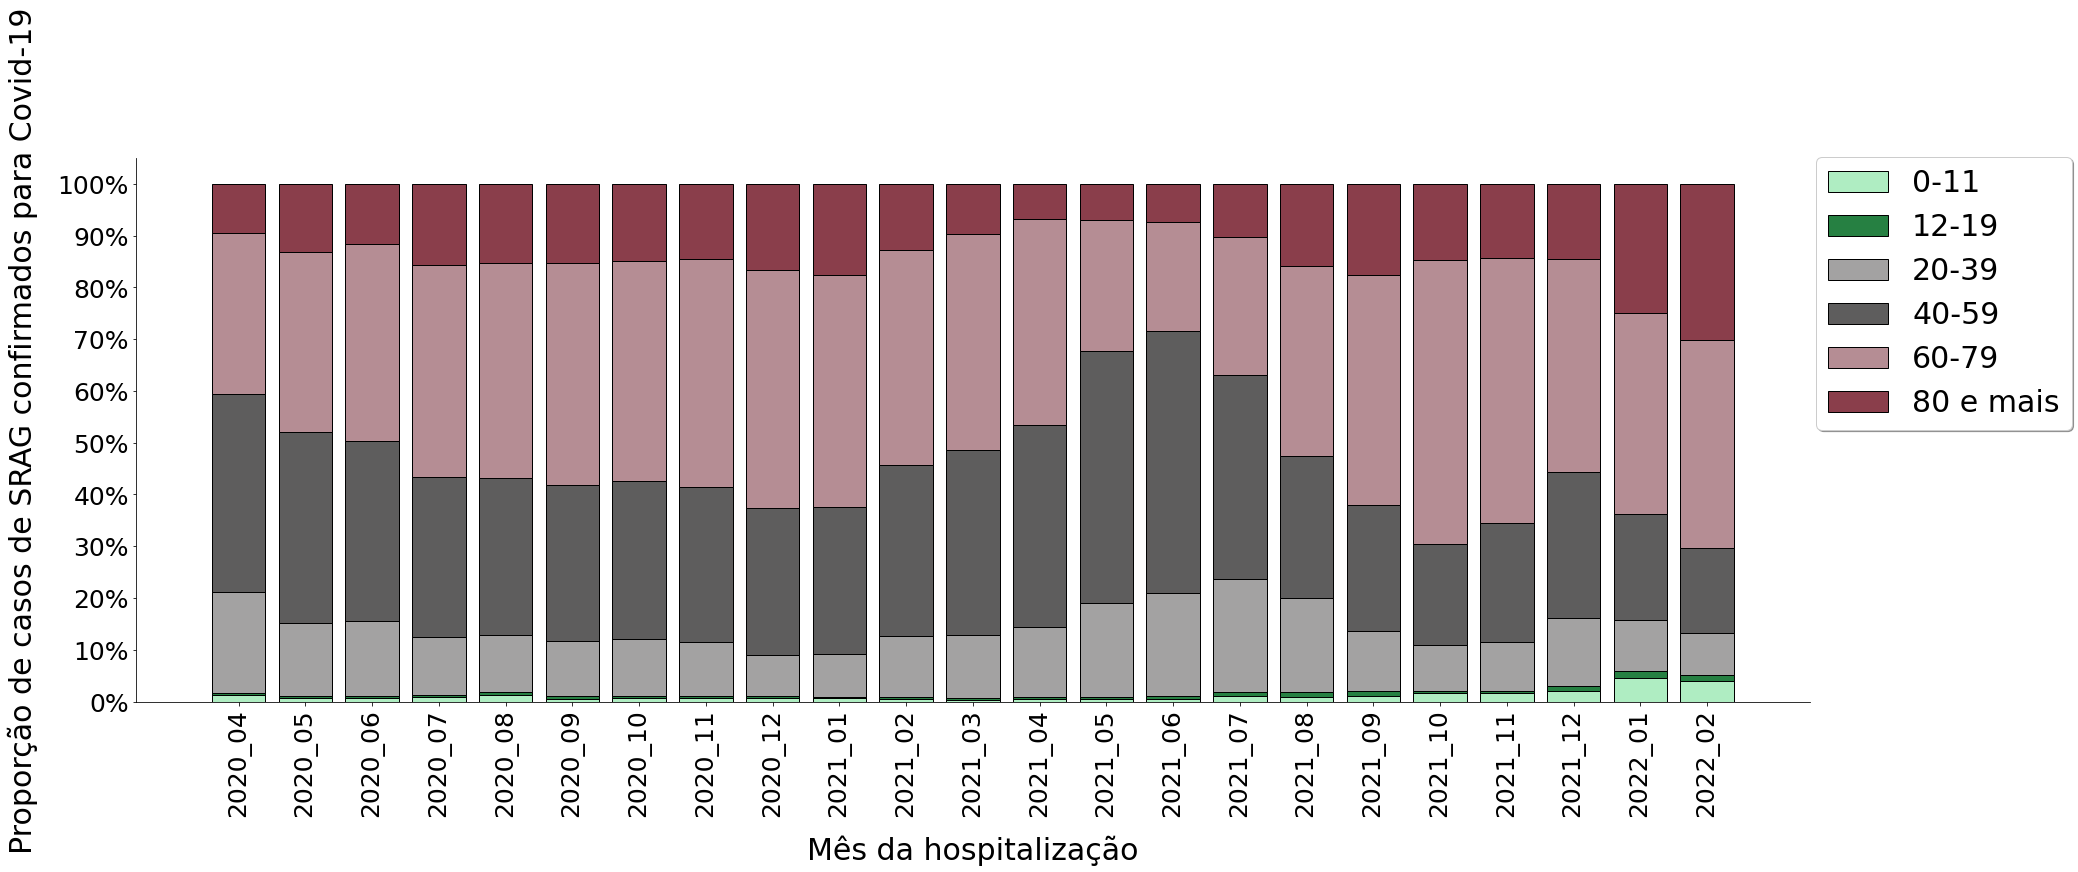

In [20]:
plt.figure(figsize=(30,10))
plt.bar(competencia,idade11, color='#afedc2',edgecolor='#000000')
plt.bar(competencia,idade19, bottom=idade11, color="#268042",edgecolor='#000000')
plt.bar(competencia,idade39, bottom=idade11 + idade19, color='#a3a2a2',edgecolor='#000000')
plt.bar(competencia,idade59, bottom=idade11 + idade19 + idade39, color='#5e5d5d',edgecolor='#000000')
plt.bar(competencia,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#b58d94',edgecolor='#000000')
plt.bar(competencia,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#8a3e4b',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês da hospitalização',fontsize=30,labelpad=18)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de casos de SRAG confirmados para Covid-19',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide10.jpeg',dpi=720,bbox_inches='tight')